<a href="https://colab.research.google.com/github/shahikiran/DataWarehouseDataMining/blob/main/lab_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas matplotlib

Province with most hydropower project  is:Province 4 (182 projects) 


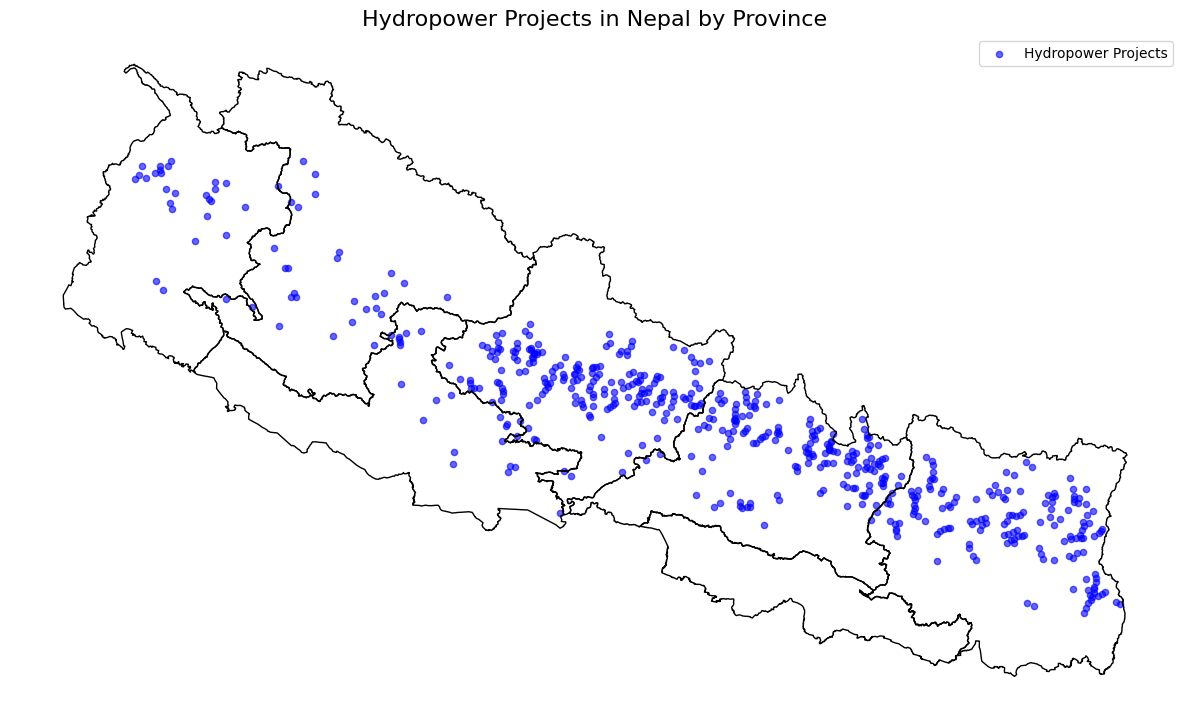

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

hydro_df=pd.read_csv("/content/hydropower-projects.csv")

province_number=hydro_df['Province'].value_counts()
top_province=province_number.idxmax()

print(f"Province with most hydropower project  is:{top_province} ({province_number.max()} projects) ")

hydro_gdf = hydro_df.dropna(subset=["Longitude", "Latitude"])
hydro_gdf = gpd.GeoDataFrame(
    hydro_gdf,
    geometry=gpd.points_from_xy(hydro_gdf["Longitude"], hydro_gdf["Latitude"]),
    crs="EPSG:4326"
)
#Load shapefile (GeoPandas will use .shp, .shx, .dbf, .prj automatically if in same folder)
province_gdf = gpd.read_file("province.shp")

province_column = 'FIRST_STAT'

#Plot the map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all provinces
province_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')



# Highlight the province with the most projects
province_gdf[province_gdf[province_column].astype(str).str.contains(top_province, case=False, na=False)]

# Plot hydropower project points
hydro_gdf.plot(ax=ax, color='blue', markersize=20, alpha=0.6, label='Hydropower Projects')

plt.title("Hydropower Projects in Nepal by Province", fontsize=16)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
!pip install requests beautifulsoup4 matplotlib seaborn nltk scikit-learn plotly


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/tmp/ipython-input-19-1537032075.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word for word, freq in top_20], y=[freq for word, freq in top_20], palette='magma')


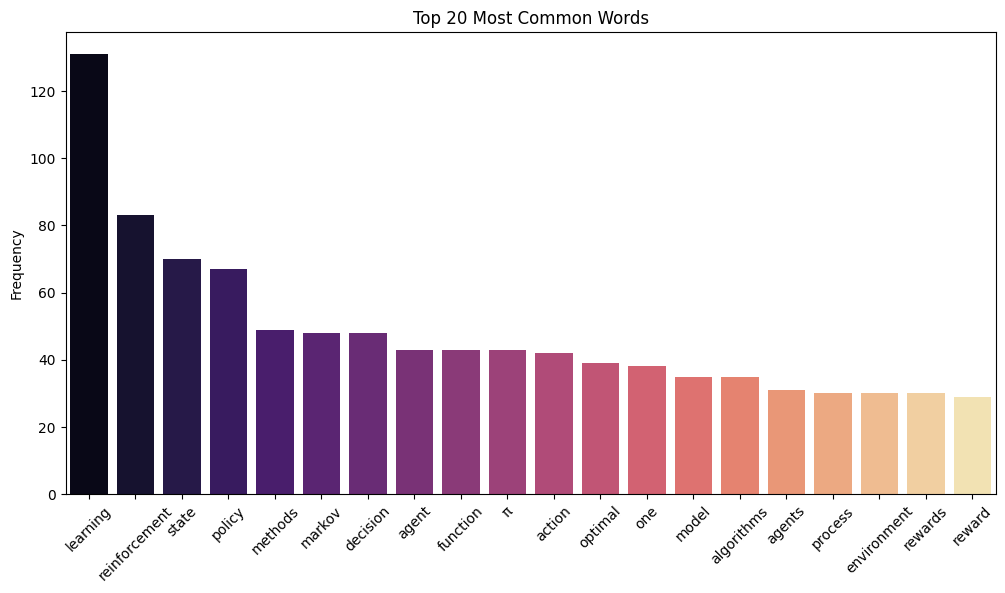

In [ ]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import plotly.graph_objects as go
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

urls = [
    "https://en.wikipedia.org/wiki/Markov_decision_process",
    "https://en.wikipedia.org/wiki/Reinforcement_learning",
    "https://en.wikipedia.org/wiki/Multi-agent_reinforcement_learning",
    "https://en.wikipedia.org/wiki/Andrew_Barto",
    "https://en.wikipedia.org/wiki/Richard_S._Sutton"
]


def scrape_and_tokenize(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])
    words = word_tokenize(text.lower())
    words = [w for w in words if w.isalpha() and w not in stopwords.words('english')]
    return words

all_words = []
for url in urls:
    all_words.extend(scrape_and_tokenize(url))

word_freq = Counter(all_words)
top_20 = word_freq.most_common(20)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=[word for word, freq in top_20], y=[freq for word, freq in top_20], palette='magma')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

In [ ]:

with open("question_3_data.txt", "r", encoding="utf-8") as f:
    full_text = f.read()

# Splitting based on double newlines (paragraph breaks or sections)
documents = [para.strip() for para in full_text.split('\n\n') if para.strip()]
print(f"Total documents (sections) found: {len(documents)}")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

#Converting documents into TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

#Cluster using KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

#cluster label for each paragraph
for i, (doc, label) in enumerate(zip(documents, kmeans.labels_)):
    print(f"\n--- Document {i+1} (Cluster {label}) ---\n{doc[:300]}...")



Total documents (sections) found: 4

--- Document 1 (Cluster 2) ---
WASHINGTON/SEATTLE, July 17 (Reuters) - A cockpit recording of dialogue between the two pilots of the Air India flight that crashed last month supports the view that the captain cut the flow of fuel to the plane's engines, said a source briefed on U.S. officials' early assessment of evidence.
The fi...

--- Document 2 (Cluster 0) ---
IEEE is launching a new publication, IEEE Climate, which aims to further the organization’s mission and vision of advancing technology for the benefit of humanity. The publication is expected to focus on how technology can play a vital role in mitigating and adapting to climate change....

--- Document 3 (Cluster 1) ---
Researchers, engineers, practitioners, and policymakers will be able to share their knowledge, insights, and innovative solutions through original content published in the magazine.
Brussels – Seeking cooperation with China, but ready to do without Beijing if relations beco

Total sessions loaded: 84


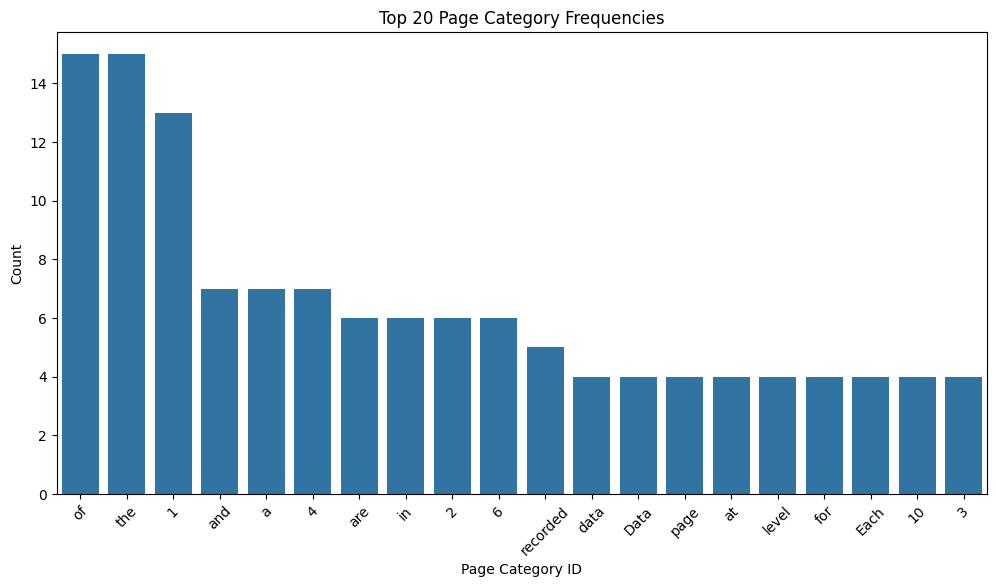

In [ ]:
data_path = "description.txt"


with open(data_path, 'r') as f:
    sessions = [line.strip().split() for line in f.readlines()]
print(f"Total sessions loaded: {len(sessions)}")


from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

all_pages = [page for session in sessions for page in session]
page_counts = Counter(all_pages)

# Sort and plot
most_common = page_counts.most_common()

#categories to show on the bar chart
num_categories_to_show = 20 #

plt.figure(figsize=(12, 6))
# Plotting 20 most common categories
sns.barplot(x=[p[0] for p in most_common[:num_categories_to_show]], y=[p[1] for p in most_common[:num_categories_to_show]])
plt.title(f"Top {num_categories_to_show} Page Category Frequencies")
plt.xlabel("Page Category ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

transition_counter = Counter()
for session in sessions:
    for i in range(len(session) - 1):
        transition = (session[i], session[i + 1])
        transition_counter[transition] += 1

#all unique page labels from all transitions
all_transition_pages = set()
for (src, dst), _ in transition_counter.items():
    all_transition_pages.add(src)
    all_transition_pages.add(dst)

#Top 30 transitions
top_transitions = transition_counter.most_common(30)

import plotly.graph_objects as go

#page labels
labels = list(all_transition_pages) #all unique pages from transitions
label_index = {label: i for i, label in enumerate(labels)}

sources = [label_index[src] for (src, dst), _ in top_transitions]
targets = [label_index[dst] for (src, dst), _ in top_transitions]
values = [count for _, count in top_transitions]

fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, label=labels),
    link=dict(source=sources, target=targets, value=values)
)])

fig.update_layout(title_text="Top 30 Page-to-Page Transitions (MSNBC)", font_size=10)
fig.show()